<a href="https://colab.research.google.com/github/DhongariPavan/Android-Authenticity-Prediction/blob/main/ML_capstone_algo_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/ML CAPSTONE PROJECT/Copy of final_dataframe.csv'
df = pd.read_csv(path)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
a = df.pop('Class')
df['Class'] = a

In [ ]:
df.head()

,Category,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),...,Your accounts : Google Maps (D),Your accounts : Google Spreadsheets (D),Your accounts : Google Voice (D),Your accounts : Google mail (D),Your accounts : Picasa Web Albums (D),Your accounts : YouTube (D),Your accounts : YouTube usernames (D),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : edit SMS or MMS (D),Your messages : read Gmail (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Derived_Prob_Text,Class
0,0.432553,3.1,77,0.0,4,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.651585,0
1,0.665267,4.3,199,0.0,4,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.756145,0
2,0.328165,4.1,243,0.0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.365056,0
3,0.159734,3.6,2589,0.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,

In [ ]:
df.Class.value_counts()

1    18232
0     9078
Name: Class, dtype: int64

In [ ]:
corr_matrix = df[['Category','Rating','Number of ratings','Price','Related apps','Dangerous permissions count','Safe permissions count','Derived_Prob_Text','Class']]

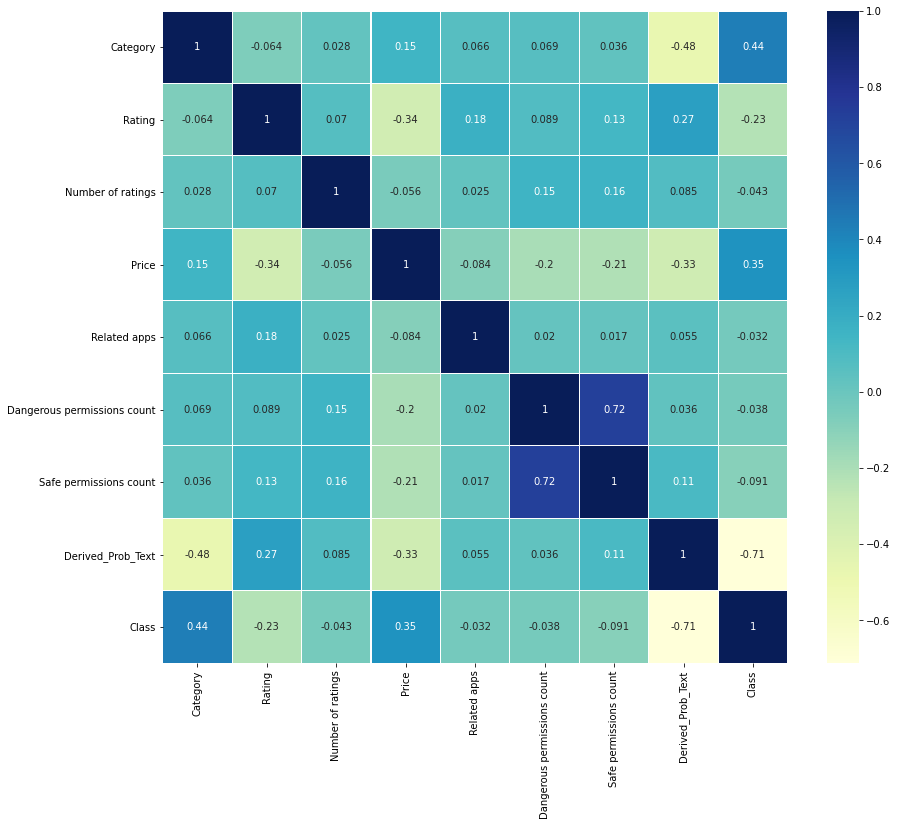

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
df2 = df.copy()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df2.iloc[:,0:-1], df2['Class'])

print('Original dataset shape', len(df2))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 27310
Resampled dataset shape 36464


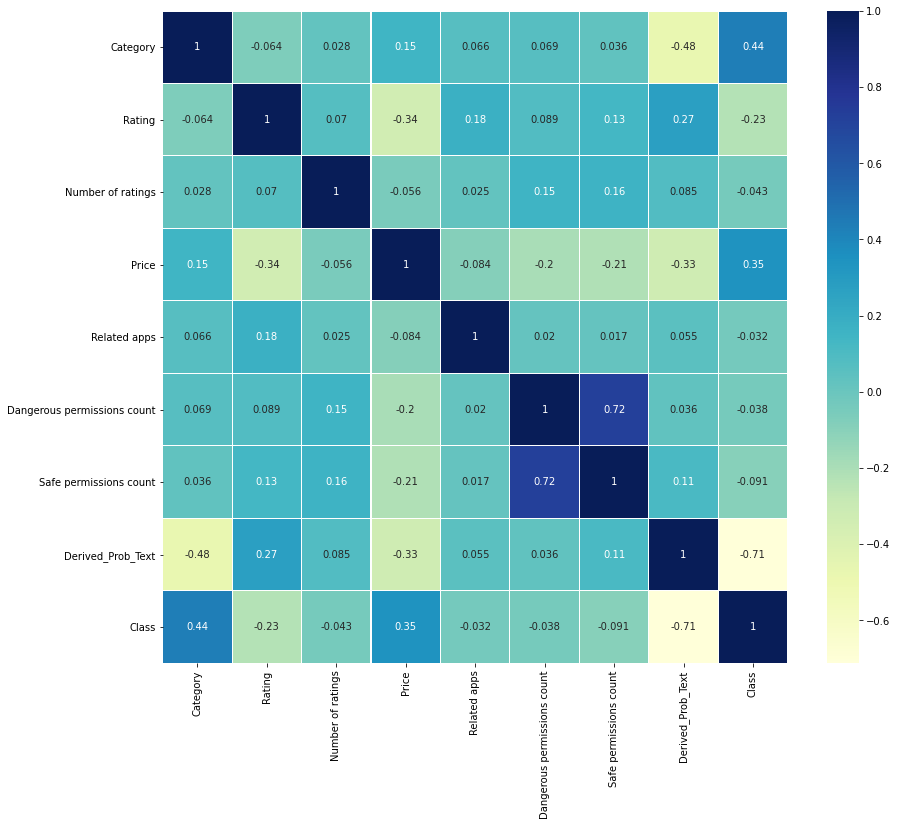

In [ ]:
corr_matrix = df2[['Category','Rating','Number of ratings','Price','Related apps','Dangerous permissions count','Safe permissions count','Derived_Prob_Text','Class']]
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
df3 = df.copy()

# Original data( without SMOTE)

In [ ]:
from sklearn.model_selection import train_test_split
# Creating the dataset with all independent variables
X = df3.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = df3.iloc[:,-1]
Y=Y.astype('int')
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.5548252726812573
Accuracy score: 0.6839985353350421


# With upsampled data using SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(x_smote,y_smote, test_size = 0.2, random_state = 3)

In [ ]:
#from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.5532692428599318
Accuracy score: 0.5527217880159057


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, Y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

print('ROCAUC score:', roc_auc_score(Y_test, xgb_y_predict))
print('Accuracy score:', accuracy_score(Y_test, xgb_y_predict))

ROCAUC score: 0.9054790984867788
Accuracy score: 0.9055258467023173


# Logestic Regresssion #

## Before Resampling ##

In [ ]:
from sklearn.model_selection import train_test_split
# Creating the dataset with all independent variables
X = df3.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = df3.iloc[:,-1]
Y=Y.astype('int')

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train,Y_train)

# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6649121201025265
The accuracy on test data is  0.6777737092640058


[[   31  7289]
 [   32 14496]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

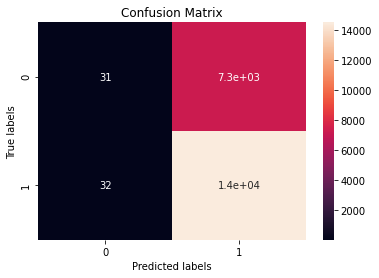

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(Y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[   7 1751]
 [   9 3695]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

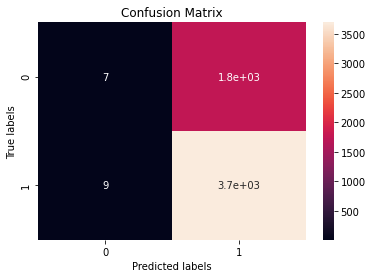

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
predictions = clf.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.44      0.00      0.01      1758
           1       0.68      1.00      0.81      3704

    accuracy                           0.68      5462
   macro avg       0.56      0.50      0.41      5462
weighted avg       0.60      0.68      0.55      5462



# after resampling #

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[ 1.22953133e-09, -4.01778187e-09, -2.81327061e-06,
         1.11871612e-09,  1.66567216e-10, -6.13489653e-10,
        -1.40142754e-09, -1.02921646e-12, -1.26932408e-12,
        -1.22484012e-14, -5.63703413e-13, -3.62028530e-12,
        -1.29195318e-12, -6.10340743e-13, -7.56797384e-13,
         9.12834872e-13, -1.29195318e-12, -5.64483292e-13,
         3.37354183e-12, -1.22484012e-14, -8.83644438e-12,
         2.85158817e-12,  1.19834144e-12,  6.90040244e-12,
        -5.89432384e-13,  1.60100991e-11, -1.49586264e-12,
        -8.01388740e-12, -6.43322247e-12,  1.40021402e-11,
         4.16565023e-12, -4.43559217e-12, -1.64361622e-12,
         8.48498047e-13, -6.41334254e-12, -2.79555737e-12,
        -5.16211561e-13,  9.97572847e-13, -1.30661047e-11,
         2.97766738e-12,  4.25152634e-13, -7.20956745e-13,
         1.83648073e-11,  7.04646855e-12, -1.28384059e-12,
        -1.86661597e-12, -5.66226979e-13, -8.41797069e-13,
        -1.38312624e-12, -6.10340743e-13,  7.07342582e-1

In [ ]:
clf.intercept_

array([9.14884376e-11])

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5372801755167803
The accuracy on test data is  0.5380501851090086


[[14580     0]
 [13498  1093]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

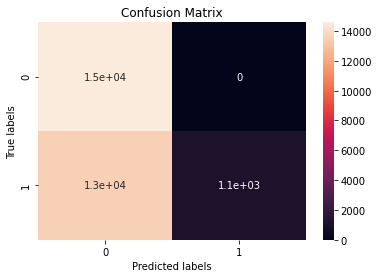

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(Y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3652    0]
 [3369  272]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

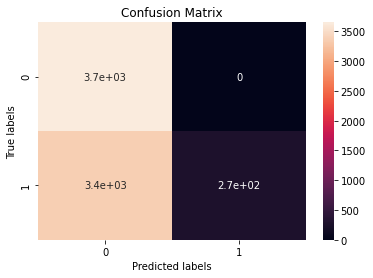

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
predictions = clf.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      3652
           1       1.00      0.07      0.14      3641

    accuracy                           0.54      7293
   macro avg       0.76      0.54      0.41      7293
weighted avg       0.76      0.54      0.41      7293



In [ ]:
print(classification_report(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      3652
           1       1.00      0.07      0.14      3641

    accuracy                           0.54      7293
   macro avg       0.76      0.54      0.41      7293
weighted avg       0.76      0.54      0.41      7293



In [ ]:
len(x_smote[0])

150